In [5]:
from sqlalchemy import create_engine
import pandas as pd

db_data = 'mysql+mysqldb://' + 'admin' + ':' + '0323A8E3DB' + '@' + 'coin-database-1-instance-1.c9hqcydvu19f.us-east-1.rds.amazonaws.com' + ':3306/' + 'crypto_db' + '?charset=utf8mb4'
engine = create_engine(db_data)

pd.set_option('display.max_rows', 500)

In [12]:
string = 'SELECT * FROM crypto_db.crypto_trades where date_buy > "2022-04-24 00:00:00"'
results = pd.read_sql_query(string, engine)

In [14]:
string = 'SELECT * FROM crypto_db.crypto_trades_ev2 where date_buy > "2022-04-24 00:00:00" ORDER BY trade_return DESC'
results = pd.read_sql_query(string, engine)

In [15]:
print(results)

    crypto_id            date_buy     price_buy           date_sell  \
0         192 2022-04-25 06:00:00      0.113900 2022-04-25 08:00:00   
1         280 2022-04-25 12:00:00      0.440100 2022-04-25 13:00:00   
2          86 2022-04-24 21:00:00      0.073000 2022-04-24 22:00:00   
3          72 2022-04-24 06:45:00      2.635000 2022-04-24 08:00:00   
4         165 2022-04-25 10:00:00      0.181700 2022-04-25 11:00:00   
5         298 2022-04-24 02:00:00  18498.700000 2022-04-24 04:00:00   
6         265 2022-04-25 03:00:00      0.194200 2022-04-25 03:00:00   
7          14 2022-04-24 13:00:00      0.599500 2022-04-24 13:00:00   
8         128 2022-04-24 06:45:00      6.047000 2022-04-24 08:00:00   
9         129 2022-04-24 19:00:00      0.040750 2022-04-24 20:00:00   
10        279 2022-04-24 02:00:00      0.003977 2022-04-24 02:45:00   
11        272 2022-04-25 06:00:00      1.001200 2022-04-25 06:15:00   
12        298 2022-04-24 15:00:00  18651.970000 2022-04-24 18:00:00   
13    

In [4]:
results['trade_return'].product()

0.9886249991879311

In [4]:

string = 'SELECT * FROM crypto_db.crypto_trades where date_buy > "2022-04-01 00:00:00"'
print(pd.read_sql_query(string, engine)['trade_return'].product())
pd.read_sql_query(string, engine)

1


,crypto_id,date_buy,price_buy,date_sell,price_sell,trade_return,trade_time,quantity


In [11]:
string = 'SELECT * FROM crypto_db.crypto_trades where date_buy > "2022-03-22 00:00:00"'
results = pd.read_sql_query(string, engine)

clean = results[ results['trade_return'] < 1.3 ]

clean['trade_return'].product()

1.1308478201740004

In [8]:
results['trade_return'].product()

1.6894866433399567

In [31]:
( sum(results['trade_return'].gt(1)) / len(results.index) ) * 100
# percentage of trades with profit

34.306569343065696

In [34]:
mean =  results.groupby(['crypto_id']).prod()

mean['count'] = results['crypto_id'].value_counts()


mean.sort_values(by='trade_return')

,price_buy,price_sell,trade_return,quantity,count
crypto_id,,,,,
170,0.018859,0.016516,0.876000,0.0,1
178,0.034700,0.031320,0.903000,0.0,1
201,0.049170,0.046140,0.938000,0.0,1
175,0.000061,0.000058,0.944108,0.0,2
21,8.590000,8.130000,0.946000,0.0,1
153,3.160000,3.023000,0.957000,0.0,1
3,1.196811,1.151325,0.961374,0.0,2
155,14697.760000,14134.650000,0.961520,0.0,2
171,2.329000,2.252000,0.967000,0.0,1


In [8]:
string = 'SELECT * FROM crypto_db.crypto_trades_ev2 ORDER BY trade_return DESC'
results = pd.read_sql_query(string, engine)
results['trade_return'].product()

1.0795751519137184

In [15]:
maxholds = 2
scaled = ((results['trade_return'] - 1) * 1/maxholds) + 1
scaled.prod()

1.0434938520471055

In [11]:
results['trade_return']

0     1.035
1     1.030
2     1.027
3     1.012
4     1.012
5     1.009
6     1.007
7     1.006
8     1.005
9     1.004
10    1.003
11    1.001
12    0.999
13    0.998
14    0.996
15    0.987
16    0.974
17    0.974
Name: trade_return, dtype: float64

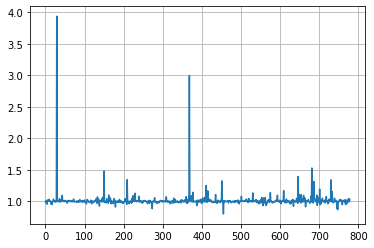

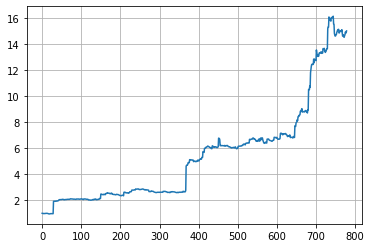

In [ ]:
import matplotlib.pyplot as plt
tradedata = np.array(tradedata)
negatives = [i for i in tradedata[:,5] if i<1]
positives = [i for i in tradedata[:,5] if i>1]
plt.plot(tradedata[:,5])
plt.grid(True)
plt.show()
plt.plot(scaled.cumprod())
plt.grid(True)
plt.show()

In [ ]:
holdingHistory = np.array(holdingHistory)

for x in range(len(id_list)):
    print(holdingHistory[:,x].sum(), end=', ')

63, 29, 78, 30, 51, 105, 168, 91, 43, 8, 58, 49, 122, 55, 34, 32, 12, 23, 30, 128, 57, 396, 520, 50, 159, 2, 19, 126, 39, 40, 19, 5, 40, 24, 74, 43, 36, 38, 56, 6, 94, 49, 